In [82]:
import numpy as np
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt

from sklearn import cluster
from sklearn import neighbors
from sklearn import naive_bayes


In [97]:
import matplotlib as mpl

default_dpi = mpl.rcParamsDefault['figure.dpi']
mpl.rcParams['figure.dpi'] = default_dpi*2

plt.rcParams.update({"font.size": 5, "lines.linewidth": 1})

In [98]:
# data params

means = [
    [3, 3],
    [9, 2], 
    [9, 6]
]

covs = [
    [
        [1.5,   0],
        [0,     1.5]
    ],
    [
        [1,     0],
        [0,     1]
    ],
    [
        [1,     0],
        [0,     1]
    ]
]

size = 200
n_classes = 3

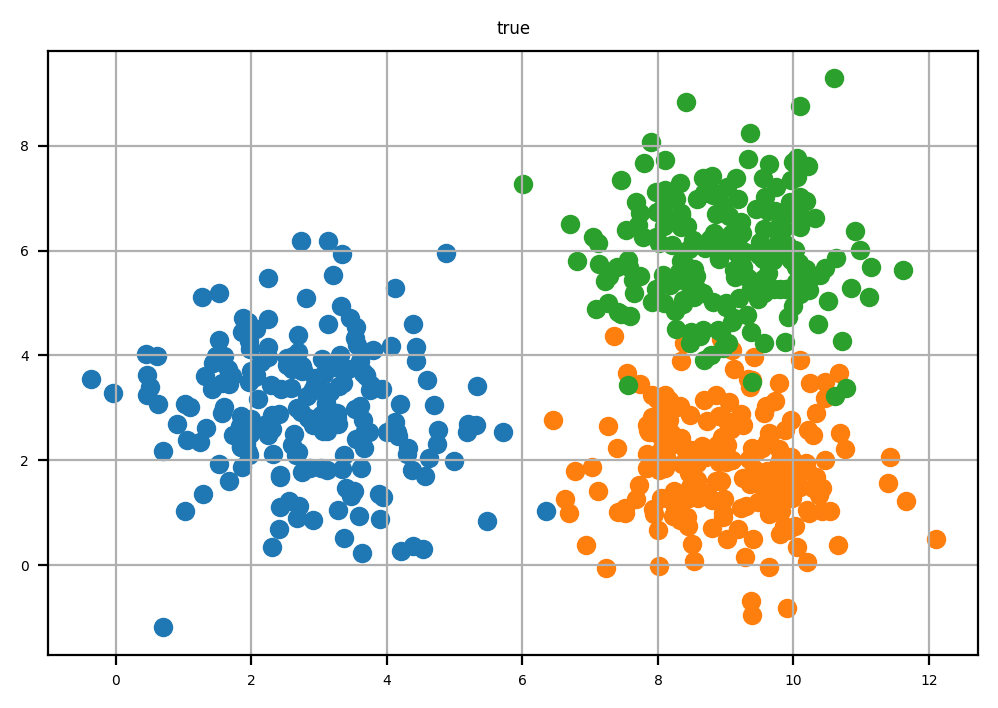

In [99]:
# data

Xs_true = [stats.multivariate_normal.rvs(mean=mean, cov=cov, size=size) for mean, cov in zip(means, covs)]
X = np.array(Xs_true).reshape(-1, 2)

plt.grid()
for x in Xs_true:
    x = np.array(x)
    plt.scatter(x[:, 0], x[:, 1])
plt.title("true")
plt.savefig(r"./plots/true.png")

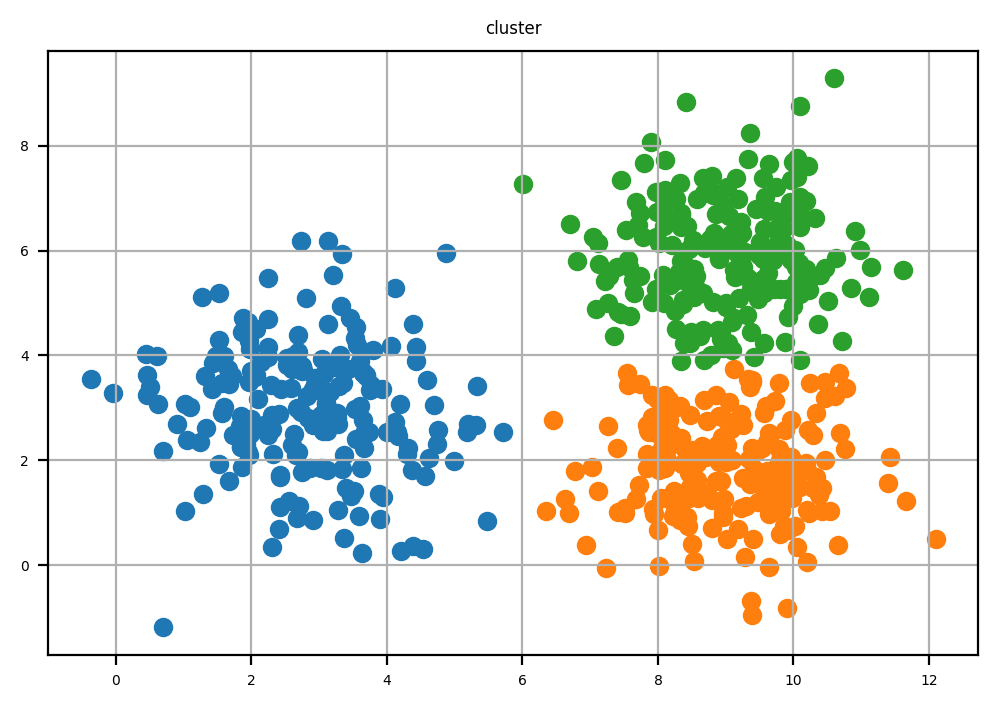

In [100]:
# clusters

cluster_model = cluster.KMeans(n_clusters=n_classes)
cluster_model.fit(X)
clust_y = cluster_model.predict(X)

predict = [[] for _ in range(n_classes)]
for xi, yi in zip(X, clust_y):
    predict[yi].append(xi)

plt.grid()
for mcluster in predict:
    mcluster = np.array(mcluster)
    plt.scatter(mcluster[:, 0], mcluster[:, 1])
plt.title("cluster")
plt.savefig(r"./plots/cluster.png")

In [101]:
# classes

y_classes = np.array([[i for _ in range(size)] for i in range(n_classes)]).reshape(-1)

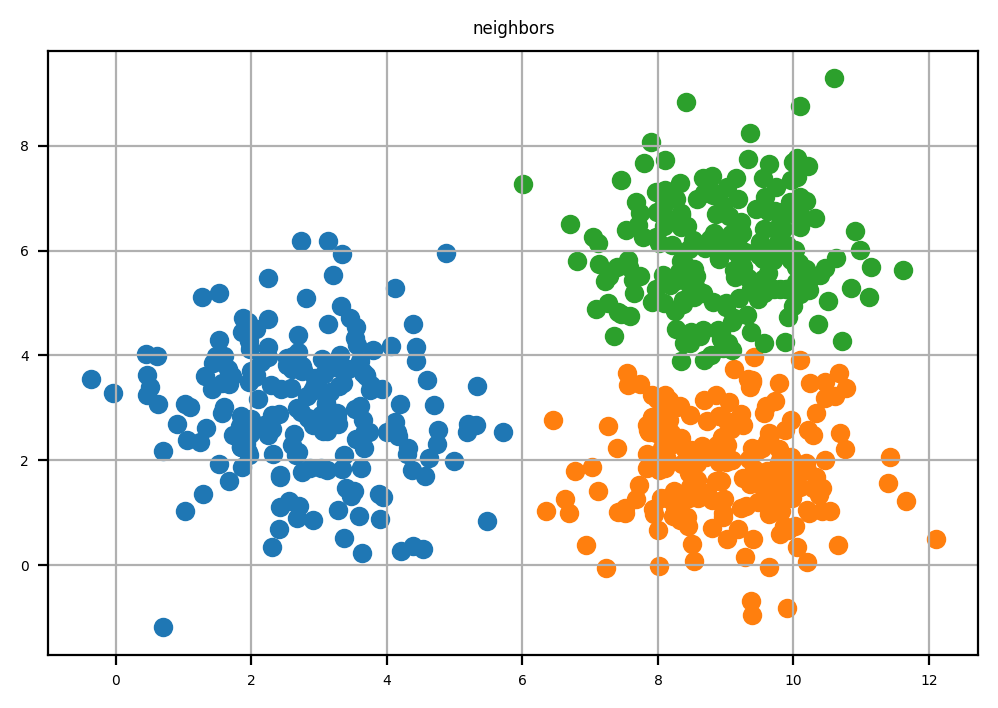

In [102]:
# k nearest

kn_model = neighbors.KNeighborsClassifier(n_neighbors=5)
kn_model.fit(X=X, y=y_classes)

y_kn = kn_model.predict(X)

mpredict = [[] for _ in range(n_classes)]
for xi, yi in zip(X, y_kn):
    mpredict[yi].append(xi)

plt.grid()
for mcluster in mpredict:
    mcluster = np.array(mcluster)
    plt.scatter(mcluster[:, 0], mcluster[:, 1])
plt.title("neighbors")
plt.savefig(r"./plots/k_nearest.png")

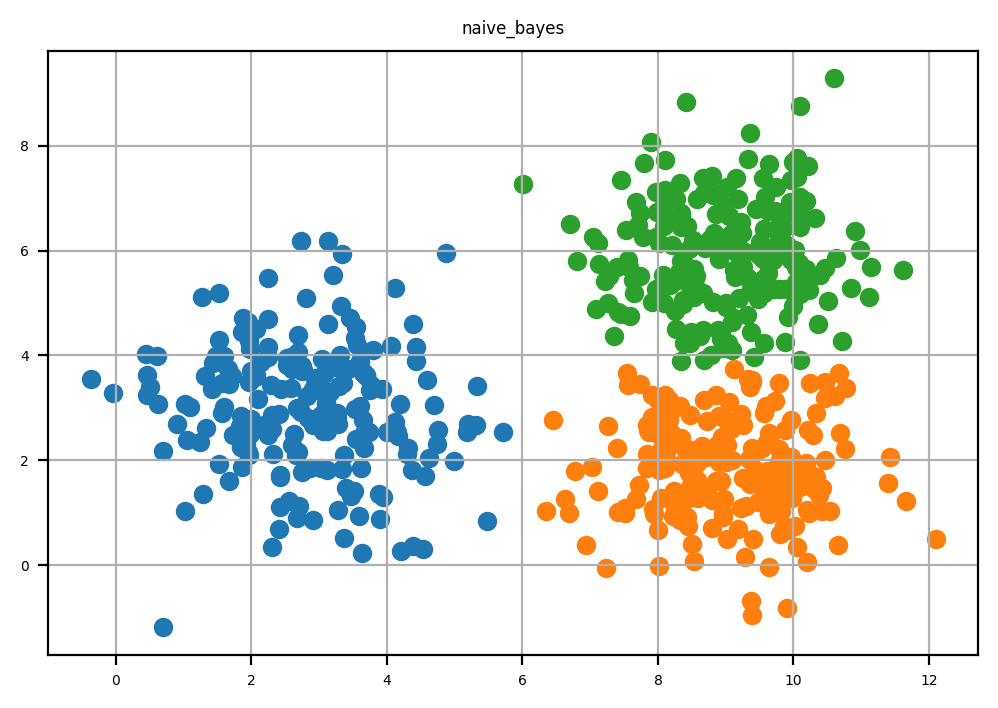

In [103]:
# naive dayes

nb_model = naive_bayes.GaussianNB()
nb_model.fit(X=X, y=y_classes)

y_nb = nb_model.predict(X)

mpredict = [[] for _ in range(n_classes)]
for xi, yi in zip(X, y_nb):
    mpredict[yi].append(xi)

plt.grid()
for mcluster in mpredict:
    mcluster = np.array(mcluster)
    plt.scatter(mcluster[:, 0], mcluster[:, 1])
plt.title("naive_bayes")
plt.savefig(r"./plots/naive_bayes.png")